In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from mpl_toolkits import mplot3d
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

In [3]:
dogdata_w_mat = io.loadmat(os.path.join('..','DATA','dogData_w.mat'))
catdata_w_mat = io.loadmat(os.path.join('..','DATA','catData_w.mat'))

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

CD = np.concatenate((dog_wave,cat_wave),axis=1)

u,s,vT = np.linalg.svd(CD-np.mean(CD),full_matrices=0)
v = vT.T

<ipython-input-4-c2b3149044c8>:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs[1].plot(v[:80,1],v[:80,3],'ro',MarkerFaceColor=(0,1,0.2),MarkerEdgeColor='k',ms=12)
<ipython-input-4-c2b3149044c8>:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs[1].plot(v[80:,1],v[80:,3],'bo',MarkerFaceColor=(0.9,0,1),MarkerEdgeColor='k',ms=12)


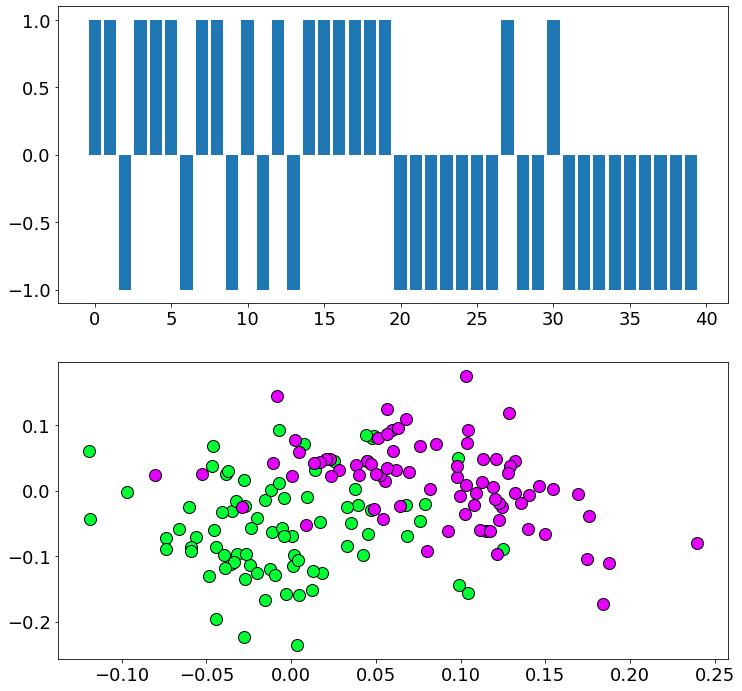

In [4]:
xtrain = np.concatenate((v[:60,np.array([1,3])],v[80:140,np.array([1,3])]))
label = np.repeat(np.array([1,-1]),60)
test = np.concatenate((v[60:80,np.array([1,3])],v[140:160,np.array([1,3])]))

lda = LinearDiscriminantAnalysis()
test_class = lda.fit(xtrain, label).predict(test)

truth = np.repeat(np.array([1,-1]),20)
E = 100*(1-np.sum(0.5*np.abs(test_class - truth))/40)

fig,axs = plt.subplots(2)
axs[0].bar(range(40),test_class)

axs[1].plot(v[:80,1],v[:80,3],'ro',MarkerFaceColor=(0,1,0.2),MarkerEdgeColor='k',ms=12)
axs[1].plot(v[80:,1],v[80:,3],'bo',MarkerFaceColor=(0.9,0,1),MarkerEdgeColor='k',ms=12)

plt.show()

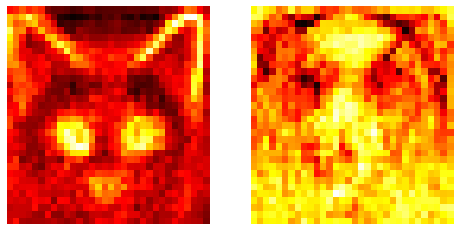

In [5]:
plt.rcParams['figure.figsize'] = [8,4]
fig,axs = plt.subplots(1,2)
for j in range(2):
    U3 = np.flipud(np.reshape(u[:,2*j+1],(32,32)))
    axs[j].pcolor(np.rot90(U3),cmap='hot')
    axs[j].axis('off')

In [6]:
dogdata_mat = io.loadmat(os.path.join('..','DATA','dogData.mat'))
catdata_mat = io.loadmat(os.path.join('..','DATA','catData.mat'))

dog = dogdata_mat['dog']
cat = catdata_mat['cat']

CD = np.concatenate((dog,cat),axis=1)

u,s,vT = np.linalg.svd(CD-np.mean(CD),full_matrices=0)
v = vT.T

<ipython-input-7-9a190f352fb0>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs[1].plot(v[:80,1],v[:80,3],'ro',MarkerFaceColor=(0,1,0.2),MarkerEdgeColor='k',ms=12)
<ipython-input-7-9a190f352fb0>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs[1].plot(v[80:,1],v[80:,3],'bo',MarkerFaceColor=(0.9,0,1),MarkerEdgeColor='k',ms=12)


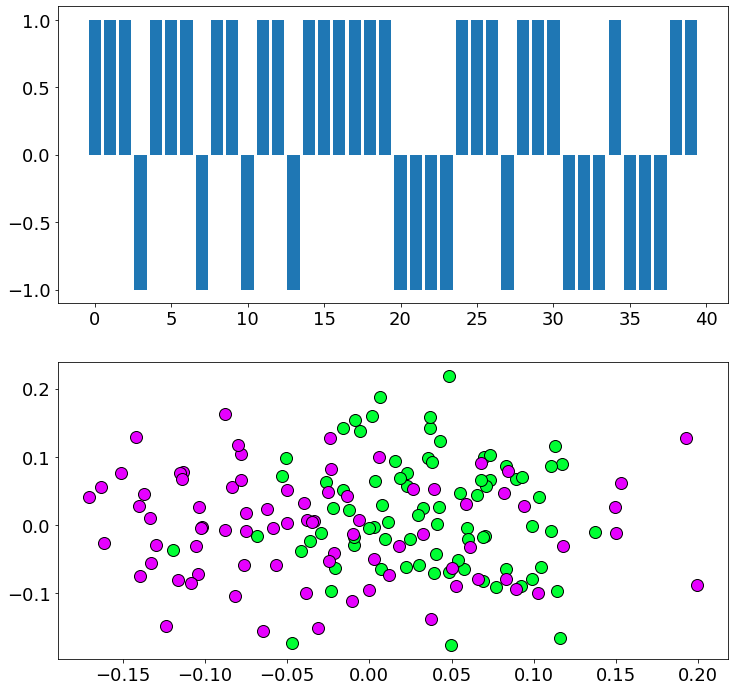

In [7]:
plt.rcParams['figure.figsize'] = [12, 12]
xtrain = np.concatenate((v[:60,np.array([1,3])],v[80:140,np.array([1,3])]))
label = np.repeat(np.array([1,-1]),60)
test = np.concatenate((v[60:80,np.array([1,3])],v[140:160,np.array([1,3])]))

lda = LinearDiscriminantAnalysis()
test_class = lda.fit(xtrain, label).predict(test)

fig,axs = plt.subplots(2)
axs[0].bar(range(40),test_class)

axs[1].plot(v[:80,1],v[:80,3],'ro',MarkerFaceColor=(0,1,0.2),MarkerEdgeColor='k',ms=12)
axs[1].plot(v[80:,1],v[80:,3],'bo',MarkerFaceColor=(0.9,0,1),MarkerEdgeColor='k',ms=12)

plt.show()

<ipython-input-8-de498ae28a7b>:24: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(range(100),np.mean(E)*np.ones(100),'r:',LineWidth=3)


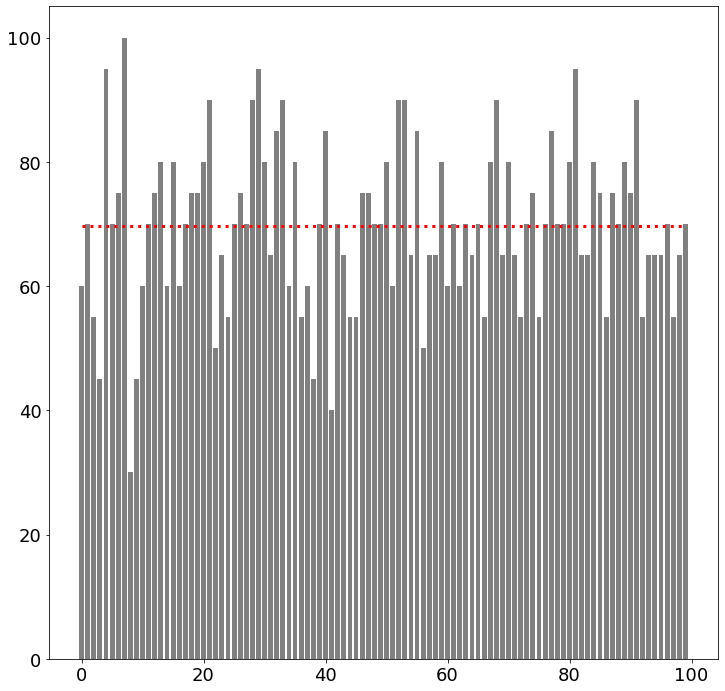

In [8]:
## Cross-validate
E = np.zeros(100)

for jj in range(100):
    r1 = np.random.permutation(80)
    r2 = np.random.permutation(80)
    ind1 = r1[:60]
    ind2 = r2[:60]+60
    ind1t = r1[60:80]
    ind2t = r2[60:80]+60
    
    xtrain = np.concatenate((v[ind1[:, np.newaxis],np.array([1,3])], v[ind2[:, np.newaxis],np.array([1,3])]))
    test = np.concatenate((v[ind1t[:, np.newaxis],np.array([1,3])], v[ind2t[:, np.newaxis],np.array([1,3])]))
    
    label = np.repeat(np.array([1,-1]),60)

    lda = LinearDiscriminantAnalysis()
    test_class = lda.fit(xtrain, label).predict(test)

    truth = np.repeat(np.array([1,-1]),20)
    E[jj] = 100*np.sum(np.abs(test_class-truth))/40
    
plt.bar(range(100),E,color=(0.5,0.5,0.5))
plt.plot(range(100),np.mean(E)*np.ones(100),'r:',LineWidth=3)
plt.show()

In [9]:
dogdata_w_mat = io.loadmat(os.path.join('..','DATA','dogData_w.mat'))
catdata_w_mat = io.loadmat(os.path.join('..','DATA','catData_w.mat'))

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

CD = np.concatenate((dog_wave,cat_wave),axis=1)

u,s,vT = np.linalg.svd(CD-np.mean(CD),full_matrices=0)
v = vT.T

<ipython-input-10-08c74477ae04>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs[j].plot(v[:80,1],v[:80,3],'ro',MarkerFaceColor=(0,1,0.2),MarkerEdgeColor='k',ms=12)
<ipython-input-10-08c74477ae04>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs[j].plot(v[80:,1],v[80:,3],'bo',MarkerFaceColor=(0.9,0,1),MarkerEdgeColor='k',ms=12)
<ipython-input-10-08c74477ae04>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs[j].plot(v[:80,1],v[:80,3],'ro',MarkerFaceColor=(0,1,0.2),MarkerEdgeColor='k',ms=12)
<ipython-input-10-08c74477ae04>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs[j].plot(v[80:,1],v[80:,3],'bo',MarkerFaceColor=(

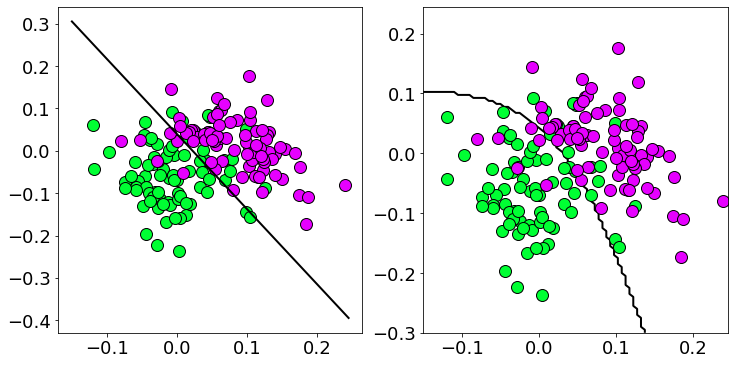

In [10]:
plt.rcParams['figure.figsize'] = [12, 6]
fig,axs = plt.subplots(1,2)
for j in range(2):
    axs[j].plot(v[:80,1],v[:80,3],'ro',MarkerFaceColor=(0,1,0.2),MarkerEdgeColor='k',ms=12)
    axs[j].plot(v[80:,1],v[80:,3],'bo',MarkerFaceColor=(0.9,0,1),MarkerEdgeColor='k',ms=12)

# Linear Discriminant
xtrain = np.concatenate((v[:60,np.array([1,3])],v[80:140,np.array([1,3])]))
test = np.concatenate((v[60:80,np.array([1,3])],v[140:160,np.array([1,3])]))
label = np.repeat(np.array([1,-1]),60)



lda = LinearDiscriminantAnalysis().fit(xtrain, label)
test_class = lda.predict(test)
K = -lda.intercept_[0]
L = -lda.coef_[0]


x = np.arange(-0.15,0.25,0.005)
axs[0].plot(x,-(L[0]*x+K)/L[1],'k',LineWidth=2)


# Quadratic Discriminant
qda = QuadraticDiscriminantAnalysis().fit(xtrain, label)
y = np.arange(-0.3,0.25,0.005)
X,Y = np.meshgrid(x,y)

Z = np.zeros_like(X)

for jj in range(len(x)):
    for kk in range(len(y)):
        Z[kk,jj] = qda.predict(np.array([[x[jj],y[kk]]]))

axs[1].contour(X,Y,Z,0,colors='k',linewidths=2)        

plt.show()
